In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# data_folder = "./2400-gene/"
# data_folder = "./9556-bromberg/"
data_folder = "./799-bromberg/"
distance_matrix = data_folder + "distance-matrix.csv"
damds_points = data_folder + "damds-points.txt"
heatmap_png = data_folder + "heatmap.png"

In [3]:
distance_df = pd.read_csv(distance_matrix, header=None)
damds_df = pd.read_csv(damds_points, usecols=[1, 2, 3], header=None, delim_whitespace=True)

In [4]:
mds_dist_df = euclidean_distances(damds_df, damds_df)

X = np.matrix(distance_df).getA1()
Y = np.matrix(mds_dist_df).getA1()

print("X size:", len(X))
print("Y size:", len(Y))

X size: 638401
Y size: 638401


In [5]:
import math

def get_location(v, minV, maxV, ntick):
    tick = (maxV - minV) / ntick
    loc = math.floor((v - minV) / tick)
    if (loc >= ntick):
        loc = ntick - 1
    return loc

def get_density_df(X, Y, nrow, ncol):
    dens = np.zeros(shape=(nrow, ncol), dtype=int)
    minX = min(X)
    maxX = math.ceil(max(X))
    stepX = (maxX - minX) / ncol
    print(minX, maxX, stepX)
    minY = min(Y)
    maxY = math.ceil(max(Y))
    stepY = (maxY - minY) / nrow
    print(minY, maxY, stepY)
    for idx in range(len(X)):
        x = X[idx]
        y = Y[idx]
        j = get_location(x, minX, maxX, ncol)
        i = get_location(y, minY, maxY, nrow)
        # print(x, y, i, j)
        dens[i, j] = dens[i, j] + 1
    df = pd.DataFrame(dens,
            index=map("{0:1.2f}".format,
                np.arange(minY, maxY, stepY, dtype=float)),
            columns=map("{0:1.2f}".format,
                np.arange(minX, maxX, stepX, dtype=float)))
    return df

In [6]:
dens = get_density_df(X, Y, 100, 100)
print("Sum:")
print(dens.values.sum())

0.0 1 0.01
0.0 2 0.02
Sum:
638401


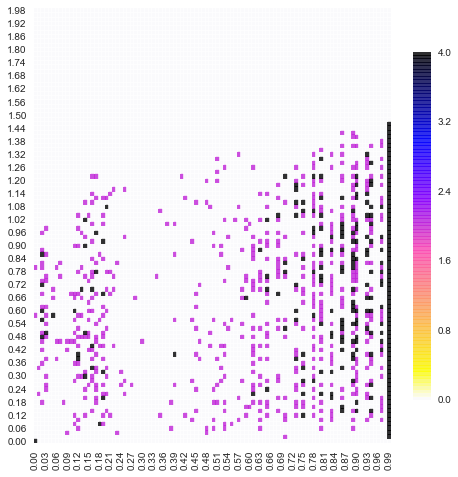

In [7]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))

# colors = sns.color_palette("YlOrRd", 10)
colors = plt.get_cmap("gnuplot2_r", 100)

# ax.set_xlim(0, 1.5)
# ax.set_ylim(0, 1.5)
ax = sns.heatmap(dens,
                 robust=True,
                 cmap=colors,
#                  square=True,
                 cbar_kws = {"shrink":.8},
                 ax=ax,
#                  mask=dens==0,
                alpha=.8)
ax.invert_yaxis()
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)
# ax.set_xlabel("Score-Distance")
# ax.set_ylabel("MDS-Distance")
# f.suptitle(
#     "Heatmap of Score-Distance vs. MDS-Distance\n"
#     "Score-Distance formula: (1.0 / score - 1.0 / max) * min * max / (max - min)\n"
#     "MDS-Distance formula: Euclidean distance of x, y, z\n"
#     "Dataset: " + data_folder
#             )

In [8]:
f.savefig(heatmap_png, dpi=400)